# 역별 승하차실적 분석_통합

- credits: https://dacon.io/competitions/official/235794/overview/description

###1. 패키지 불러오기

In [ ]:
import pandas as pd #파일불러올 떄
import numpy as np
import matplotlib as mpl #시각화
import matplotlib.pyplot as plt
import seaborn as sns #boxplot등 그래프 그릴 때 필요함
import os #디렉토리
from scipy import stats

import missingno as msno #결측치 확인할 수 있는 패키지
plt.style.use('seaborn')

import warnings #경고 무시하기
warnings.filterwarnings("ignore")

mpl.rcParams['axes.unicode_minus'] = False #마이너스 폰트가 깨지는 것을 방지

%matplotlib inline

# 기본적인 모듈을 import 합니다. 
# mlp.rcParams['axes.unicode_minus'] = False 코드는 그래프에서 마이너스 폰트가 깨지는 문제에 대한 대처입니다.

In [ ]:
# 한글폰트 사용 in colab
%matplotlib inline  

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

NanumBarunGothic


###2. 데이터 정제 및 병합

In [ ]:
#2018년 데이터
df_2018 = pd.read_csv('역별 승하차실적_2018.csv')
df_2018['운행년도'] = df_2018.운행일자.str.split(' ').str[0] #운행년도 분리
df_2018['운행월'] = df_2018.운행일자.str.split(' ').str[1] #운행월 분리
df_2018['운행일'] = df_2018.운행일자.str.split(' ').str[2] #운행일 분리
#동계 올림픽 기간 제외(2월[2월 9일~2월 25일이길래 아예 2월을 제외하는게 나을 것 같아요!])
df_2018_new=df_2018[df_2018['운행월']!='02월']
df_2018_new.head()

,운행일자,운행영업일단계,주운행선,상행하행구분,역무열차종,정차역,메트릭,승차인원수,하차인원수,운행년도,운행월,운행일
0,2018년 01월 01일,공휴일,경부선,하행,KTX,서울,NaN,"20,699",90,2018년,01월,01일
1,2018년 01월 01일,공휴일,경부선,하행,KTX,용산,NaN,"1,907",0,2018년,01월,01일
2,2018년 01월 01일,공휴일,경부선,하행,KTX,영등포,NaN,173,0,2018년,01월,01일
3,2018년 01월 01일,공휴일,경부선,하행,KTX,수원,NaN,"1,674",44,2018년,01월,01일
4,2018년 01월 01일,공휴일,경부선,하행,KTX,대전,NaN,"3,015","5,302",2018년,01월,01일


In [ ]:
#2019년 데이터
df_2019 = pd.read_csv('역별 승하차실적_2019.csv')
df_2019['운행년도'] = df_2019.운행일자.str.split(' ').str[0] #운행년도 분리
df_2019['운행월'] = df_2019.운행일자.str.split(' ').str[1] #운행월 분리
df_2019['운행일'] = df_2019.운행일자.str.split(' ').str[2] #운행일 분리
df_2019.head()

,운행일자,운행영업일단계,주운행선,상행하행구분,역무열차종,정차역,메트릭,승차인원수,하차인원수,운행년도,운행월,운행일
0,2019년 01월 01일,공휴일,경부선,하행,KTX,서울,NaN,"18,130",34,2019년,01월,01일
1,2019년 01월 01일,공휴일,경부선,하행,KTX,영등포,NaN,634,4,2019년,01월,01일
2,2019년 01월 01일,공휴일,경부선,하행,KTX,수원,NaN,"1,602",54,2019년,01월,01일
3,2019년 01월 01일,공휴일,경부선,하행,KTX,대전,NaN,"2,214","4,053",2019년,01월,01일
4,2019년 01월 01일,공휴일,경부선,하행,KTX,동대구,NaN,"1,854","6,884",2019년,01월,01일


In [ ]:
#2020년 데이터
df_2020 = pd.read_csv('역별 승하차실적_2020.csv')
df_2020['운행년도'] = df_2020.운행일자.str.split(' ').str[0] #운행년도 분리
df_2020['운행월'] = df_2020.운행일자.str.split(' ').str[1] #운행월 분리
df_2020['운행일'] = df_2020.운행일자.str.split(' ').str[2] #운행일 분리
df_2020.head()

,운행일자,운행영업일단계,주운행선,상행하행구분,역무열차종,정차역,메트릭,승차인원수,하차인원수,운행년도,운행월,운행일
0,2020년 01월 01일,공휴일,경부선,하행,KTX,서울,NaN,"17,858",27,2020년,01월,01일
1,2020년 01월 01일,공휴일,경부선,하행,KTX,영등포,NaN,708,2,2020년,01월,01일
2,2020년 01월 01일,공휴일,경부선,하행,KTX,수원,NaN,"1,744",65,2020년,01월,01일
3,2020년 01월 01일,공휴일,경부선,하행,KTX,대전,NaN,"2,091","4,500",2020년,01월,01일
4,2020년 01월 01일,공휴일,경부선,하행,KTX,동대구,NaN,"1,688","6,774",2020년,01월,01일


In [ ]:
#2019년 데이터
df_2021 = pd.read_csv('역별 승하차실적_2021.csv')
df_2021['운행년도'] = df_2021.운행일자.str.split(' ').str[0] #운행년도 분리
df_2021['운행월'] = df_2021.운행일자.str.split(' ').str[1] #운행월 분리
df_2021['운행일'] = df_2021.운행일자.str.split(' ').str[2] #운행일 분리
df_2021.head()

,운행일자,운행영업일단계,주운행선,상행하행구분,역무열차종,정차역,메트릭,승차인원수,하차인원수,운행년도,운행월,운행일
0,2021년 01월 01일,공휴일,경부선,하행,KTX,서울,NaN,"6,561",7,2021년,01월,01일
1,2021년 01월 01일,공휴일,경부선,하행,KTX,영등포,NaN,355,0,2021년,01월,01일
2,2021년 01월 01일,공휴일,경부선,하행,KTX,수원,NaN,844,24,2021년,01월,01일
3,2021년 01월 01일,공휴일,경부선,하행,KTX,대전,NaN,877,"1,932",2021년,01월,01일
4,2021년 01월 01일,공휴일,경부선,하행,KTX,동대구,NaN,736,"3,281",2021년,01월,01일


- 데이터 병합

In [ ]:
df=pd.concat([df_2018_new, df_2019, df_2020, df_2021], ignore_index=True)

In [ ]:
df.head() #병합된 데이터 확인

,운행일자,운행영업일단계,주운행선,상행하행구분,역무열차종,정차역,메트릭,승차인원수,하차인원수,운행년도,운행월,운행일
0,2018년 01월 01일,공휴일,경부선,하행,KTX,서울,NaN,"20,699",90,2018년,01월,01일
1,2018년 01월 01일,공휴일,경부선,하행,KTX,용산,NaN,"1,907",0,2018년,01월,01일
2,2018년 01월 01일,공휴일,경부선,하행,KTX,영등포,NaN,173,0,2018년,01월,01일
3,2018년 01월 01일,공휴일,경부선,하행,KTX,수원,NaN,"1,674",44,2018년,01월,01일
4,2018년 01월 01일,공휴일,경부선,하행,KTX,대전,NaN,"3,015","5,302",2018년,01월,01일


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1855754 entries, 0 to 1855753
Data columns (total 12 columns):
 #   Column   Dtype  
---  ------   -----  
 0   운행일자     object 
 1   운행영업일단계  object 
 2   주운행선     object 
 3   상행하행구분   object 
 4   역무열차종    object 
 5   정차역      object 
 6   메트릭      float64
 7   승차인원수    object 
 8   하차인원수    object 
 9   운행년도     object 
 10  운행월      object 
 11  운행일      object 
dtypes: float64(1), object(11)
memory usage: 169.9+ MB


- 결측값 확인

In [ ]:
for col in df.columns:
    msperc = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df[col].isnull().sum() / df[col].shape[0]))
    print(msperc)
#메트릭은 지워야할듯

column:       운행일자	 Percent of NaN value: 0.00%
column:    운행영업일단계	 Percent of NaN value: 0.00%
column:       주운행선	 Percent of NaN value: 0.00%
column:     상행하행구분	 Percent of NaN value: 0.00%
column:      역무열차종	 Percent of NaN value: 0.00%
column:        정차역	 Percent of NaN value: 0.00%
column:        메트릭	 Percent of NaN value: 100.00%
column:      승차인원수	 Percent of NaN value: 0.00%
column:      하차인원수	 Percent of NaN value: 0.00%
column:       운행년도	 Percent of NaN value: 0.00%
column:        운행월	 Percent of NaN value: 0.00%
column:        운행일	 Percent of NaN value: 0.00%


메트릭 외 결측값 없음

- 데이터타입 확인 후 승차인원, 하차인원 정수형을 타입변환

In [ ]:
#숫자 , 제거(float type으로 변환위해)
df["승차인원수"] = df["승차인원수"].str.replace(',', '')
df["하차인원수"] = df["하차인원수"].str.replace(',', '')

In [ ]:
##데이터타입 정수로 변환
df['하차인원수'] = df.하차인원수.astype(int)
df['승차인원수'] = df.하차인원수.astype(int)

In [ ]:
df.dtypes #바뀐 것 확인

운행일자        object
운행영업일단계     object
주운행선        object
상행하행구분      object
역무열차종       object
정차역         object
메트릭        float64
승차인원수        int64
하차인원수        int64
운행년도        object
운행월         object
운행일         object
dtype: object

###3. EDA
##### 1) 지역별 통행량
##### 2) 연도 별 통행량
##### 3) 월별 통행량

In [ ]:
df.head()

,운행일자,운행영업일단계,주운행선,상행하행구분,역무열차종,정차역,메트릭,승차인원수,하차인원수,운행년도,운행월,운행일
0,2018년 01월 01일,공휴일,경부선,하행,KTX,서울,NaN,90,90,2018년,01월,01일
1,2018년 01월 01일,공휴일,경부선,하행,KTX,용산,NaN,0,0,2018년,01월,01일
2,2018년 01월 01일,공휴일,경부선,하행,KTX,영등포,NaN,0,0,2018년,01월,01일
3,2018년 01월 01일,공휴일,경부선,하행,KTX,수원,NaN,44,44,2018년,01월,01일
4,2018년 01월 01일,공휴일,경부선,하행,KTX,대전,NaN,5302,5302,2018년,01월,01일


In [ ]:
df.tail()

,운행일자,운행영업일단계,주운행선,상행하행구분,역무열차종,정차역,메트릭,승차인원수,하차인원수,운행년도,운행월,운행일
1855749,2021년 05월 31일,평일,강릉선,상행,KTX-호남,서원주,NaN,16,16,2021년,05월,31일
1855750,2021년 05월 31일,평일,강릉선,상행,KTX-호남,횡성,NaN,32,32,2021년,05월,31일
1855751,2021년 05월 31일,평일,강릉선,상행,KTX-호남,둔내,NaN,6,6,2021년,05월,31일
1855752,2021년 05월 31일,평일,강릉선,상행,KTX-호남,평창,NaN,25,25,2021년,05월,31일
1855753,2021년 05월 31일,평일,강릉선,상행,KTX-호남,진부,NaN,21,21,2021년,05월,31일


In [ ]:
#csv파일로 저장
df.to_csv('df_all.csv', index=True)

#### 1) 지역별 통행량

In [ ]:
#정차역-하차인원수만 추출
station=df[['정차역', '하차인원수']]
station.head()

,정차역,하차인원수
0,서울,90
1,용산,0
2,영등포,0
3,수원,44
4,대전,5302


In [ ]:
station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1855754 entries, 0 to 1855753
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   정차역     object
 1   하차인원수   int64 
dtypes: int64(1), object(1)
memory usage: 28.3+ MB


In [ ]:
station['하차인원수'].sum() #코로나 이전 총 통행량

402514983

In [ ]:
station_result=station.groupby(station['정차역'])['하차인원수'].sum()
station_result=station_result.reset_index()

In [ ]:
station_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   정차역     291 non-null    object
 1   하차인원수   291 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.7+ KB


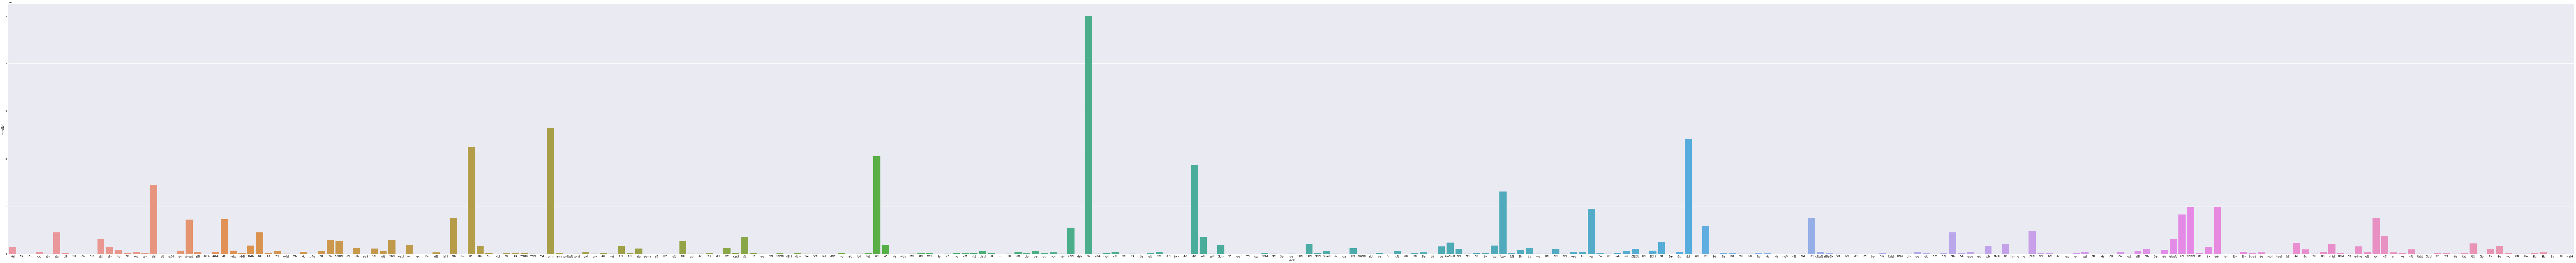

In [ ]:
fig, ax = plt.subplots(figsize = (200, 20))

sns.barplot(data = station_result, y = "하차인원수", x = "정차역")

광명, 대전, 동대구, 부산, 서울, 수원, 영등포, 오송, 용산이 이용량이 많았다
- 이용객 특정 숫자 이상 지역
- 강릉, 목포, 전주지역 역 매칭 후 이용객 확인
- 운행 영업일 따른 이용객 분석

#### 2) 연도별 통행량

In [ ]:
#pd.set_option('display.max_rows', None)
year_result=df.groupby(df['운행년도'])['하차인원수'].sum()
year_result=year_result.reset_index()
year_result

,운행년도,하차인원수
0,2018년,130025769
1,2019년,145967979
2,2020년,89272930
3,2021년,37248305


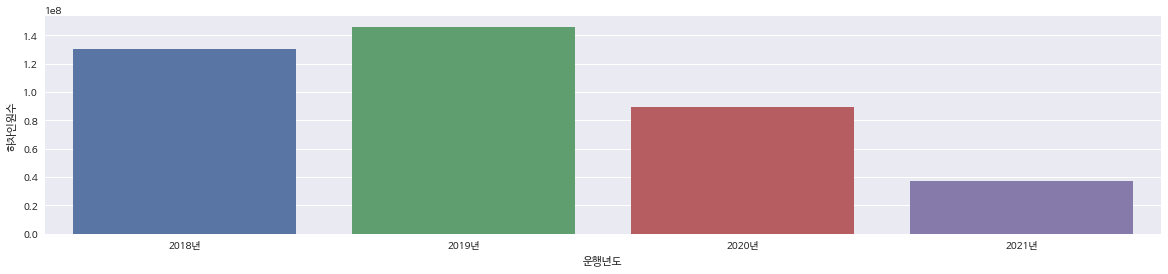

In [ ]:
fig, ax = plt.subplots(figsize = (20, 4))
sns.barplot(data = year_result, y = "하차인원수", x = "운행년도")

- 2018년 보다 2019년의 통행량이 더 많았음
- 2020년에 통행량이 떨어진 것을 볼 수 있음
- 2021년도에는 더 적음

#### 3) 월별 통행량

In [ ]:
month_result=df.groupby(df['운행월'])['하차인원수'].sum()
month_result=month_result.reset_index()
month_result

,운행월,하차인원수
0,01월,39907086
1,02월,24957666
2,03월,35711602
3,04월,37312503
4,05월,42514149
5,06월,31256230
6,07월,31582627
7,08월,32159706
8,09월,30242089
9,10월,33355324


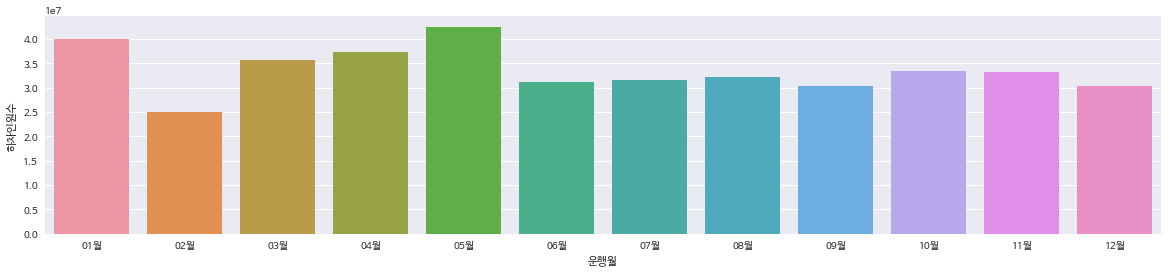

In [ ]:
fig, ax = plt.subplots(figsize = (20, 4))
sns.barplot(data = month_result, y = "하차인원수", x = "운행월")

그 외에는 비슷했으나 상대적으로 공휴일이 몰려있는(어린이날, 부처님오신 날, 어버이날 등등) 5월의 통행량이 제일 많았음